# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Muhammad Fathan Mukhlisan]
- **Email:** [famukh16@gmail.com]
- **ID Dicoding:** [Input Username]

## Pertanyaan Bisnis

1. Apakah aman kualitas udara di sekitar Guanyuan berdasarkan waktu?
2. Bagaimana tingkat temperatur udara dan curah hujan pada musim-musim di sekitar Guanyuan?
3. Kemana arah angin dan berapa kecepatan angin berdasarkan musim-musim di sekitar Guanyuan?


## Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
gy_df = pd.read_csv("data/PRSA_Data_Guanyuan_20130301-20170228.csv", delimiter=",")
gy_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


### Assessing Data

In [4]:
gy_df.info()

gy_df.isnull().sum()

print("\nTotal Duplikat :", gy_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB

Total Duplikat : 0


In [5]:
gy_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- Terdapat value null di beberapa atribut
- Terdapat value inaccurate (maksimum yang mungkin melebihi batas)

### Cleaning Data

In [6]:
means = gy_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP']].mean()

gy_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP']] = gy_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP']].fillna(means)

In [7]:
value = {
    'PM2.5': 125, 'PM10': 150, 'SO2': 50, 'NO2': 100, 'CO': 2000, 'O3': 120
}

for atribut, nilai_perkiraan in value.items():
    maksimum = gy_df[atribut].max()
    gy_df[atribut] = gy_df[atribut].replace(maksimum, nilai_perkiraan)
        

**Insight:**
- Hanya mengisi value null di atribut PM2.5, PM10, SO2, NO2, CO, TEMP karena untuk menghitung kualitas dan temperatur udara
- Mengisi value inaccurate dengan value perkiraan jika kemungkinan data di IQR 100%

## Exploratory Data Analysis (EDA)

### Explore ...

In [10]:
def waktu(hour):
    if 4 <= hour <= 9:
        return "Pagi"
    elif 10 <= hour <= 15:
        return "Siang"
    else:
        return "Malam"   
gy_df['waktu'] = gy_df['hour'].apply(waktu)

def musim(month):
    if month in [12, 1, 2]:
        return "Dingin"
    elif month in [3, 4, 5]:
        return "Semi"
    elif month in [6, 7, 8]:
        return "Panas"
    elif month in [9, 10, 11]:
        return "Gugur"
gy_df['musim'] = gy_df['month'].apply(musim)


waktu untuk membagi hour menjadi 3 (Pagi, Siang, Malam) dan musim (Semi, Panas, Gugur, Dingin) kemudian kolom ditambahkan ke DataFrame

In [11]:
tingkat_polusi = gy_df.groupby(by ='waktu').agg({
        "PM2.5" : "mean",
        "PM10" : "mean",
        "SO2" : "mean",
        "NO2" : "mean",
        "CO" : "mean",
        "O3" : "mean"}).sort_values(by = 'waktu')

tingkat_polusi

,PM2.5,PM10,SO2,NO2,CO,O3
waktu,,,,,,
Malam,86.489220,116.028151,17.283814,60.427245,1276.473570,60.986080
Pagi,80.082912,102.926271,16.874412,61.359109,1344.453367,26.975040
Siang,78.608823,101.013787,18.894005,49.373577,1181.388682,74.199324


Menghitung rata-rata tingkat partikel (polusi) berdasarkan waktu

In [12]:
temp_hujan = gy_df.groupby(by='musim').agg({
    "TEMP": "mean",
    "RAIN": "mean"
}).sort_values(by='musim')

temp_hujan

,TEMP,RAIN
musim,,
Dingin,-0.178540,0.003757
Gugur,13.033148,0.057177
Panas,26.174615,0.180616
Semi,15.041413,0.026710


Menghitung rata-rata suhu dan curah hujan berdasarkan waktu

In [13]:
arah_angin = gy_df.groupby(by='musim').agg({
    'wd': lambda x: x.mode()[0], 
    'WSPM': 'mean'
}).sort_values(by='musim')

arah_angin

,wd,WSPM
musim,,
Dingin,NE,1.867163
Gugur,NE,1.408498
Panas,NE,1.477197
Semi,SW,2.080876


Menentukan arah angin lebih sering kemana dengan rata-rata kecepatan angin

## Visualization & Explanatory Analysis

### Pertanyaan 1:

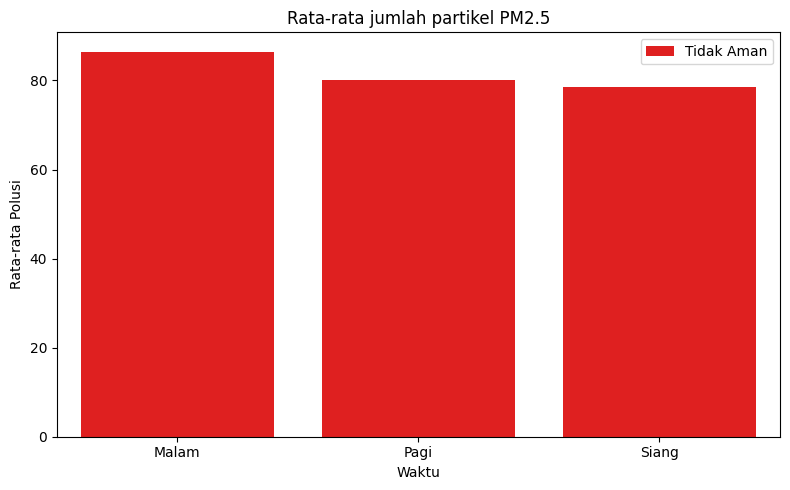

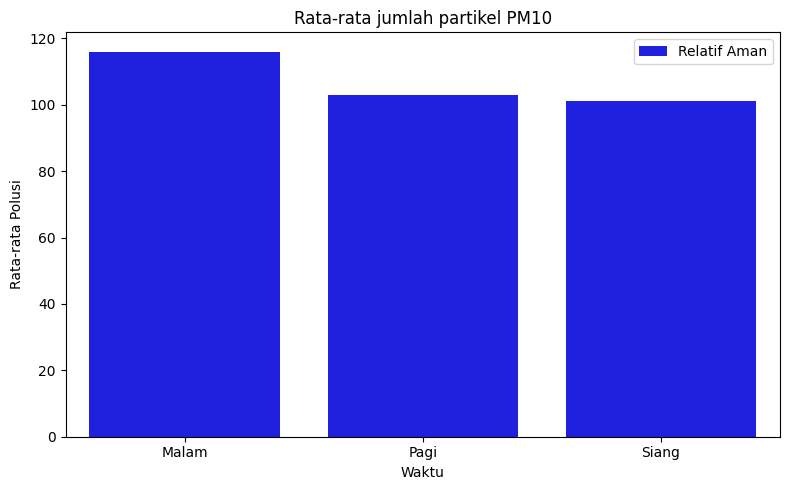

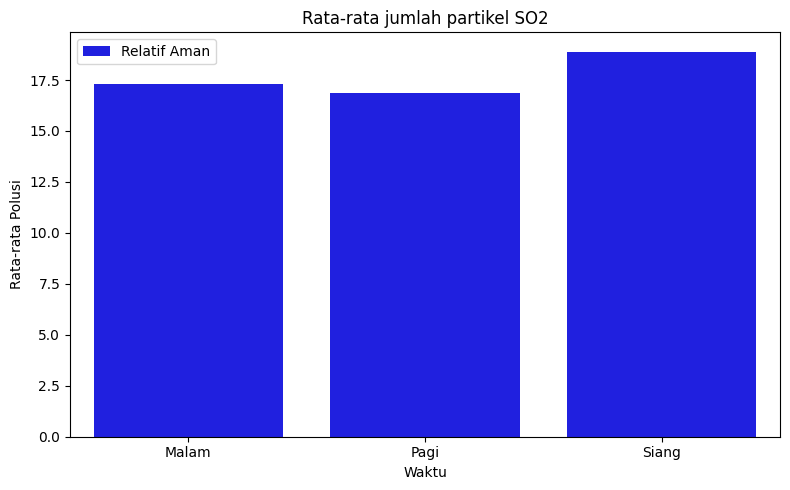

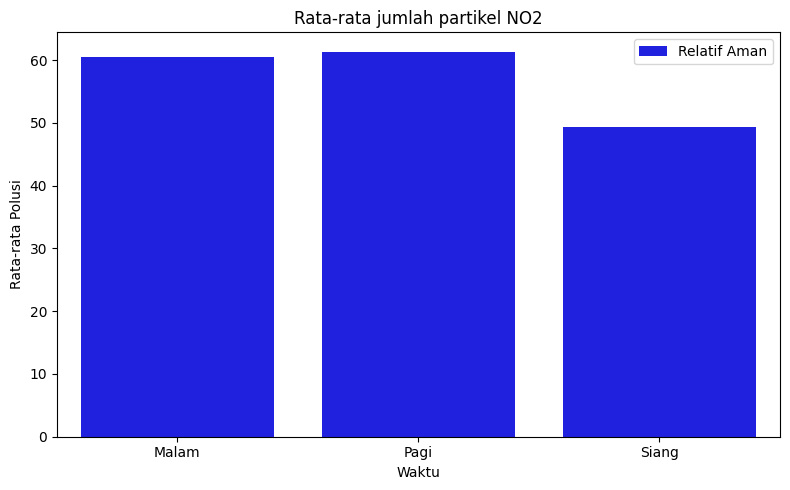

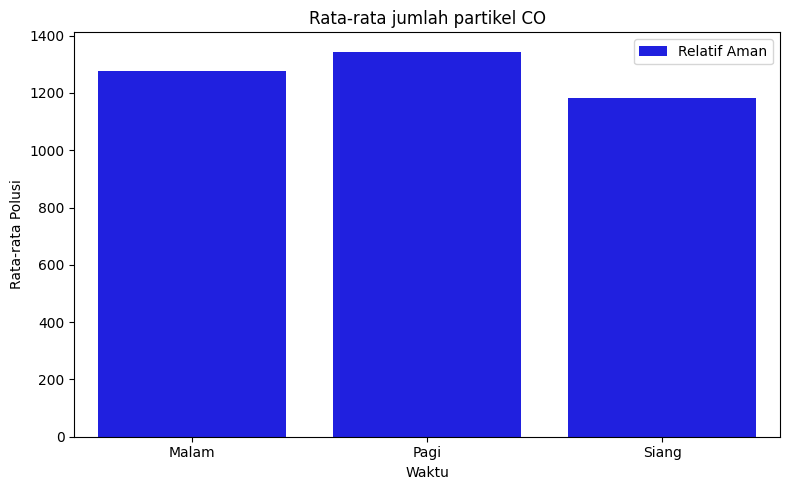

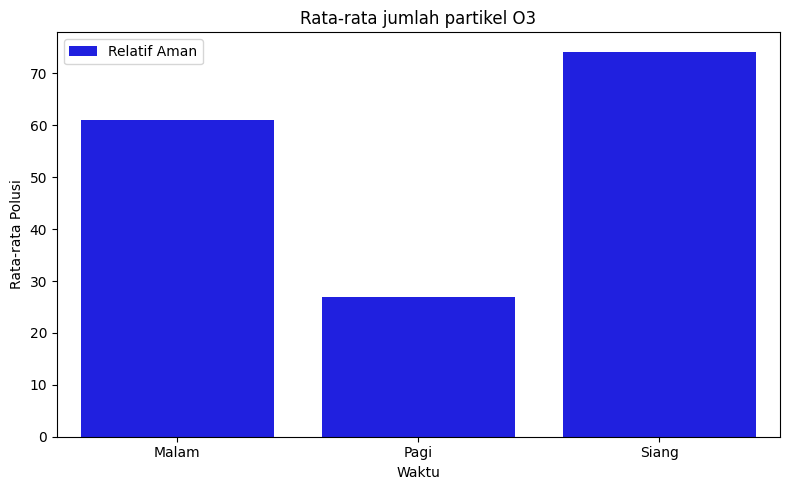

In [14]:
melt = tingkat_polusi.reset_index().melt(id_vars='waktu', var_name='Polusi', value_name='Rata-rata')

def categorize(value, param):
    if param == "PM2.5":
        return 'Relatif Aman' if value <= 55.4 else 'Tidak Aman'
    elif param == "PM10":
        return 'Relatif Aman' if value <= 350 else 'Tidak Aman'
    elif param == "SO2":
        return 'Relatif Aman' if value <= 400 else 'Tidak Aman'
    elif param == "O3":
        return 'Relatif Aman' if value <= 400 else 'Tidak Aman'
    elif param == "NO2":
        return 'Relatif Aman' if value <= 1130 else 'Tidak Aman'
    elif param == "CO":
        return 'Relatif Aman'

melt['Kategori'] = melt.apply(lambda row: categorize(row['Rata-rata'], row['Polusi']), axis=1)
palette = {'Relatif Aman': 'blue', 'Tidak Aman': 'red'}

for polusi in melt['Polusi'].unique():
    plt.figure(figsize=(8, 5))
    subset = melt[melt['Polusi'] == polusi]
    sns.barplot(data=subset, x='waktu', y='Rata-rata', hue='Kategori', palette=palette)
    
    plt.title(f'Rata-rata jumlah partikel {polusi}')
    plt.xlabel('Waktu')
    plt.ylabel('Rata-rata Polusi')
    plt.legend(title='')
    plt.tight_layout()
    
    plt.show()

- Menentukan apakah jumlah partikel yang terdapat di udara itu berada pada jumlah relatif aman (biru) atau tidak aman (merah)

### Pertanyaan 2:

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19072\939187476.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_hujan.reset_index(), x='musim', y='TEMP', palette=warna)


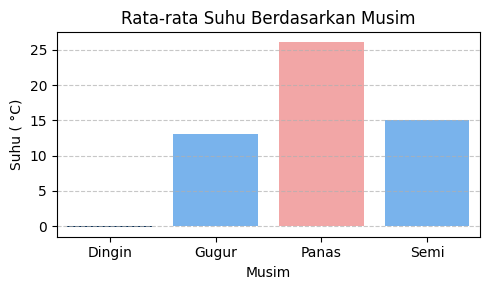

In [15]:
warna = {
    'Dingin': '#003366',   
    'Gugur': '#66b3ff',   
    'Semi': '#66b3ff',    
    'Panas': '#ff9999'    
}

plt.figure(figsize=(5, 3))
sns.barplot(data=temp_hujan.reset_index(), x='musim', y='TEMP', palette=warna)

plt.title('Rata-rata Suhu Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Suhu ( °C)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

- Rata-rata suhu berdasarkan musim 

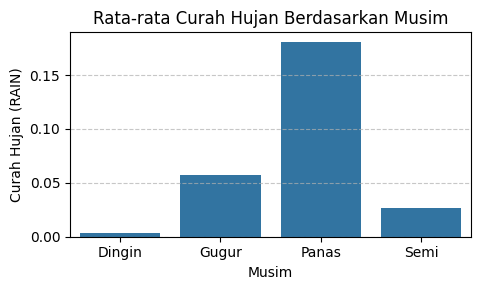

In [16]:
plt.figure(figsize=(5, 3))
sns.barplot(data=temp_hujan.reset_index(), x='musim', y='RAIN')

plt.title('Rata-rata Curah Hujan Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Curah Hujan (RAIN)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

- Rata-rata curah hujan berdasarkan musim 

### Pertanyaan 3:

In [17]:
print(arah_angin)

        wd      WSPM
musim               
Dingin  NE  1.867163
Gugur   NE  1.408498
Panas   NE  1.477197
Semi    SW  2.080876


- Menentukan Cenderung arah mata angin dengan kecepatannya

## Conclusion

- Jumlah partikel-partikel yang terdapat dalam udara di sekitar Guanyuan termasuk sedikit(kategori: relatif aman), kecuali jumlah partikel PM2.5 yang termasuk ke dalam kategori: tidak aman. Berdasarkan Indeks Standar Pencemar Udara.
- pada musim dingin, rata-rata suhu mencapai (- 0.17°C), arah mata angin sering ke NorthEast (1,8 m/s).
- pada musim gugur, rata-rata suhu mencapai (- 13.0°C), arah mata angin sering ke NorthEast  (1,4 m/s).
- pada musim panas, rata-rata suhu mencapai (- 26.1°C), arah mata angin sering ke NorthEast  (1,4 m/s).
- pada musim semi, rata-rata suhu mencapai (- 15.0 °C), arah mata angin sering ke Southwest  (2,0 m/s).
- curah hujan ringan di semua musim.

In [18]:
gy_df.to_csv("all_data.csv", index=False)